In [237]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns

<h3>Load the data into a pandas dataframe<h3>

In [238]:
data = pd.read_csv("income_evaluation.csv")
df = data.copy()
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Checking Null values

In [239]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [240]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [241]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

Exploraty Data Analysis

<Axes: xlabel=' workclass', ylabel='count'>

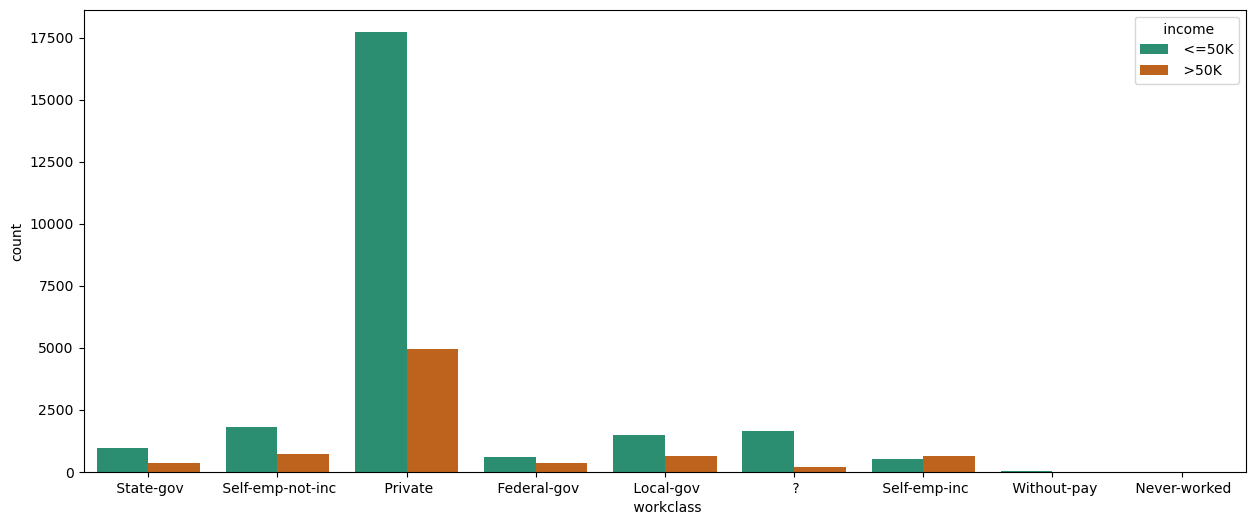

In [242]:
plt.figure(figsize = (15,6))
sns.countplot(x=' workclass', hue=' income', data=df, palette='Dark2')

In [243]:
wc = pd.get_dummies(df[" workclass"],drop_first=True)
df.drop([" workclass"],axis=1,inplace=True)
df = pd.concat([df,wc],axis=1)


In [244]:
df


,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,0,1,0,0,0,0
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0,0,1,0,0,0,0
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0,1,0,0,0,0


In [245]:
df.columns

Index(['age', ' fnlwgt', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income',
       ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object')

<Axes: xlabel=' education', ylabel='count'>

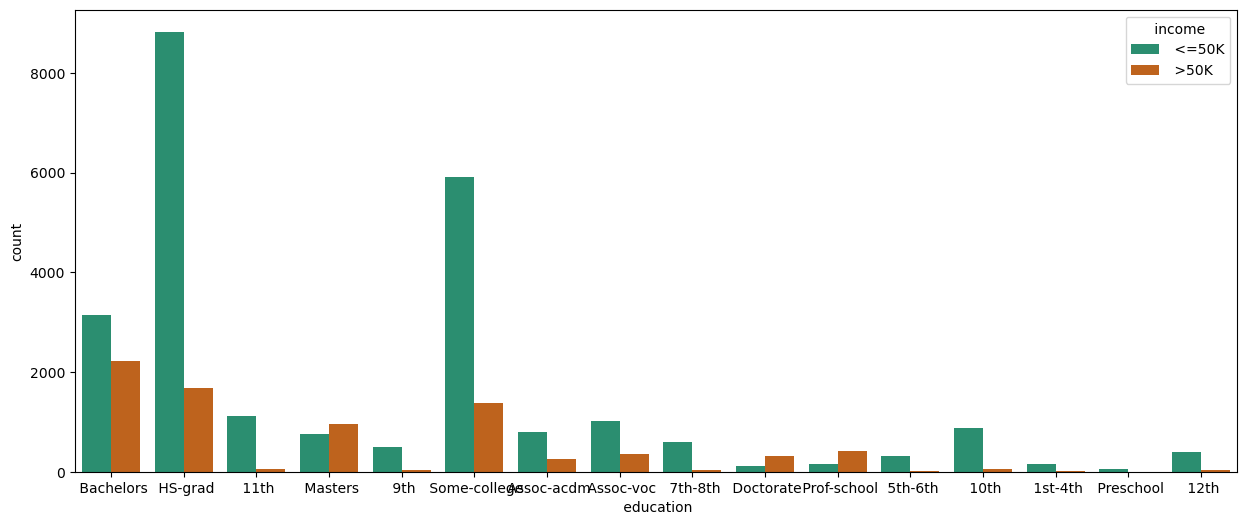

In [246]:
plt.figure(figsize = (15,6))
sns.countplot(x=' education', hue=' income', data=df, palette='Dark2')

<Axes: xlabel=' sex', ylabel='count'>

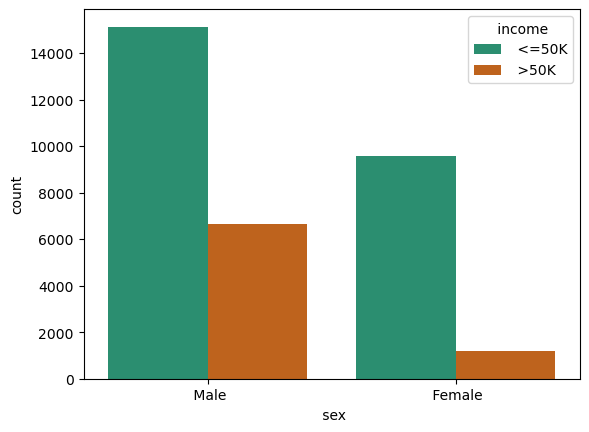

In [247]:
sns.countplot(x=' sex', hue=' income', data=df, palette='Dark2')

In [248]:
pd.set_option('display.max_columns', None)
df.head()

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,0,1,0,0,0,0


In [249]:
oc = pd.get_dummies(df[" occupation"],drop_first=True)
education = pd.get_dummies(df[" education"],drop_first=True)
rel = pd.get_dummies(df[" relationship"],drop_first=True)
sex = pd.get_dummies(df[" sex"],drop_first=True)
ms = pd.get_dummies(df[" marital-status"],drop_first=True)
df.drop([" occupation"," education"],axis=1,inplace=True)
df = pd.concat([df,oc,ms,rel,education,sex],axis=1)

In [250]:
df[" education-num"].nunique()

16

<Axes: xlabel=' marital-status', ylabel='count'>

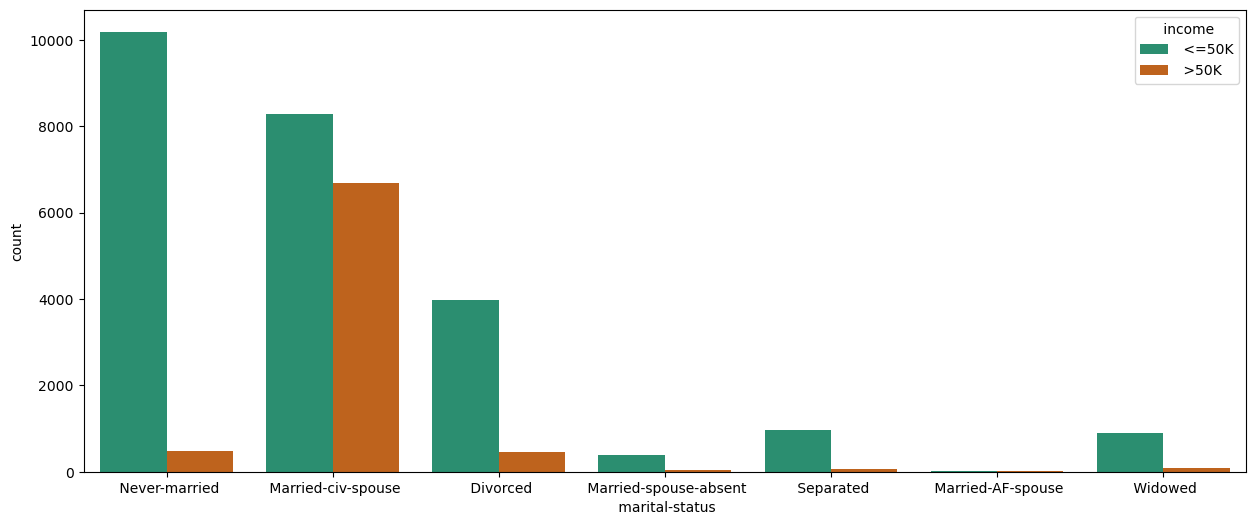

In [251]:
plt.figure(figsize = (15,6))
sns.countplot(x=' marital-status', hue=' income', data=df, palette='Dark2')

In [252]:
df.drop([" marital-status"," relationship"," native-country"," sex"," fnlwgt"," education-num"],axis=1,inplace=True)

In [253]:
pd.set_option('display.max_columns', None)
df.head()

,age,race,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male
0,39,White,2174,0,40,<=50K,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,50,White,0,0,13,<=50K,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38,White,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,53,Black,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,28,Black,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [254]:
income = pd.get_dummies(df[" income"],drop_first=True)
race =pd.get_dummies(df[" race"],drop_first=True)
df.drop([" income"," race"],axis=1,inplace=True)
df = pd.concat([df,race,income],axis=1)

In [255]:
pd.set_option('display.max_columns', None)
df.head()

,age,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,Wife,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male,Asian-Pac-Islander,Black,Other,White,>50K
0,39,2174,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,50,0,0,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,38,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,53,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,28,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [256]:
df.columns


Index(['age', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
       ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial',
       ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct',
       ' Other-service', ' Priv-house-serv', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving',
       ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' 11th',
       ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm',
       ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
       ' Preschool', ' Prof-school', ' Some-college', ' Male',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' >50K'],
    

Train/ Test split

In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(" >50K",axis=1), df[" >50K"], test_size = 0.2,random_state=100)

Modelling

In [258]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [259]:
y_pred = log_model.predict(X_test)
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(y_test,y_pred)

0.7610559528978056

In [260]:
from sklearn.metrics import  classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4593,  315],
       [ 664,  941]], dtype=int64)

In [261]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4908
           1       0.75      0.59      0.66      1605

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



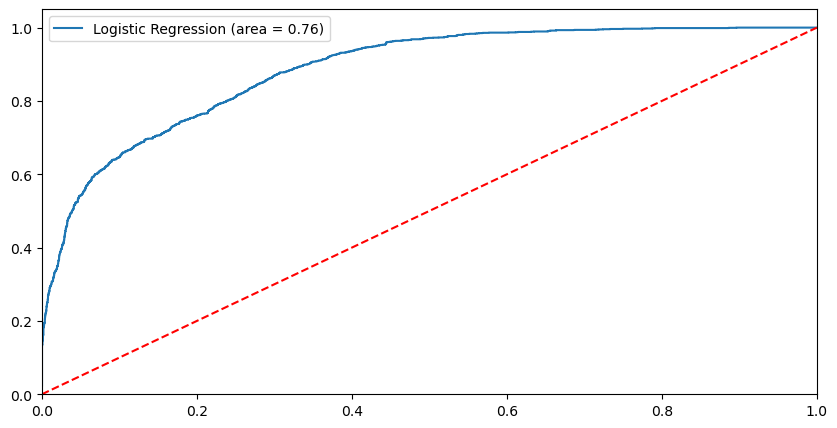

In [262]:
logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [263]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [264]:
y_pred= NBmodel.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7954327856865389

In [265]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4908
           1       0.63      0.73      0.68      1605

    accuracy                           0.83      6513
   macro avg       0.77      0.80      0.78      6513
weighted avg       0.84      0.83      0.83      6513



In [266]:
confusion_matrix(y_test,y_pred)

array([[4221,  687],
       [ 432, 1173]], dtype=int64)

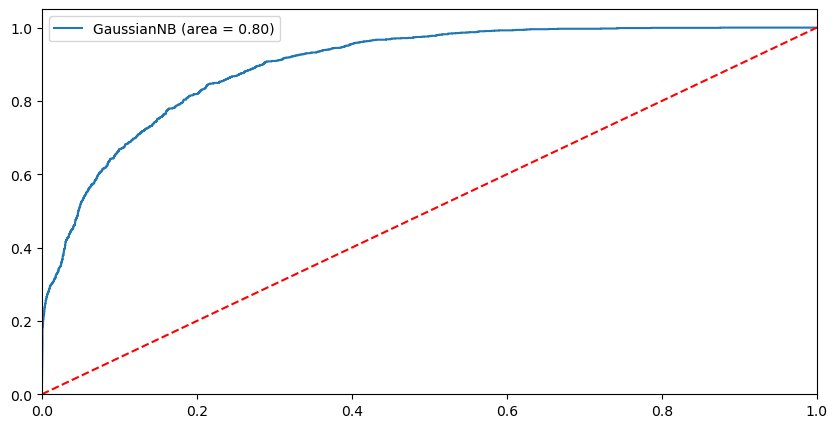

In [267]:
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='GaussianNB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [268]:
from sklearn.tree import  DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [269]:
y_pred = dt_model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7573882808156052

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4908
           1       0.64      0.63      0.64      1605

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



In [271]:
confusion_matrix(y_test,y_pred)

array([[4346,  562],
       [ 595, 1010]], dtype=int64)

In [272]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [273]:
y_pred = rfc.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7760120802199727

In [274]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4908
           1       0.71      0.64      0.67      1605

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.84      0.85      0.84      6513



In [275]:
confusion_matrix(y_test,y_pred)

array([[4486,  422],
       [ 581, 1024]], dtype=int64)

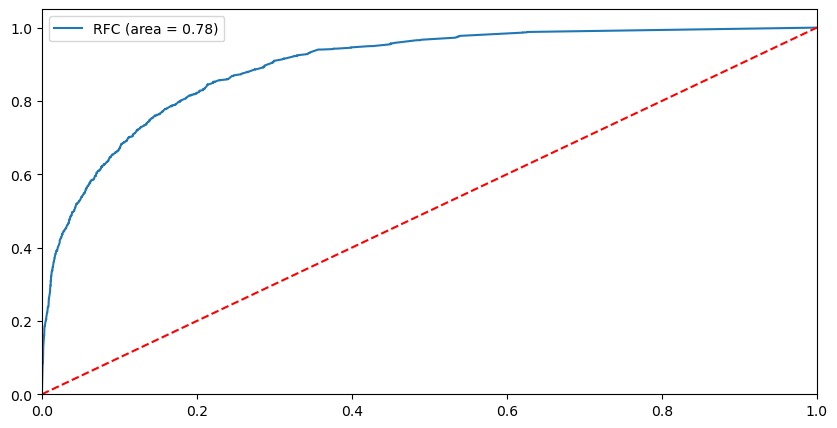

In [276]:
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()